# **MÓDULO 12 - Pratique**  
  
Abaixo temos um dataframe com as seguintes informações:

**Nome**: O nome de cada indivíduo da base

**Idade**: A idade de cada um deles

**Profissão**: A atual ocupação

**Salário**: O salário registrado

**Limite de crédito**: O limite de crédito disponível para cada um dos indivíduos

**Historico_Inadimplencia**: Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.

**Estado civil**: O estado civil de cada um deles

**Imovel_Proprio**: Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [85]:
import pandas as pd

In [86]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.  
  
Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

# **Tratando Dados**

In [87]:
df['Salário'] = df['Salário'].astype(int)
df['Idade'] = df['Idade'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)                                                 

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Gráfico de linhas e colunas**  
No gráfico abaixo podemos observar a relação das variáveis limite de crédito e salário por idade. Verifica-se que o salário acompanha de forma crescente a variável idade, a variável limite de crédito possui um comportamento semelhante, contudo, há alguns pontos não acompanha o crescimento das outras duas variáveis.

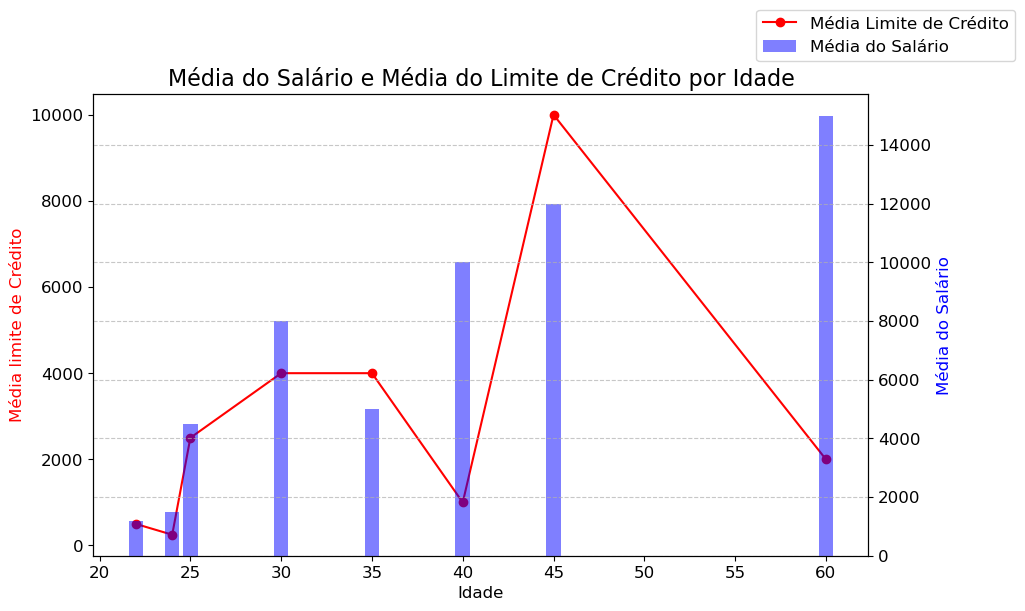

In [89]:
media_salario_por_idade = df.groupby('Idade')['Salário'].mean()

media_credito_por_idade = df.groupby('Idade')['Limite_Credito'].mean()
media_credito_por_idade = media_credito_por_idade.sort_index()

# Criando Gráfico de linha
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(media_credito_por_idade.index, media_credito_por_idade, marker='o', color='red', label='Média Limite de Crédito')
ax1.set_xlabel('Idade', fontsize=12)
ax1.set_ylabel('Média limite de Crédito', color='red')

# Criando Gráfico de barra
ax2 = ax1.twinx()
ax2.bar(media_salario_por_idade.index, media_salario_por_idade, color='blue', alpha=0.5, label='Média do Salário')
ax2.set_ylabel('Média do Salário', color='blue', fontsize=12)

#Legendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.title('Média do Salário e Média do Limite de Crédito por Idade', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Gráfico de dispersão**  
No gráfico de dispersão é possível conferir um dos possíveis motivos para o limite de crédito concedido não acompanhar a variável salário. No campo superior do gráfico observamos esferas que representam salários altos, mas que possuem um limite de crédito baixo, esses dados estão no eixo 1.0 - que representa os clientes que possuem histórico de inadimplência. 
Já no campo inferior está o eixo 0.0 e ele representa as clientes que **não** possuem histórico de inadimplência. 

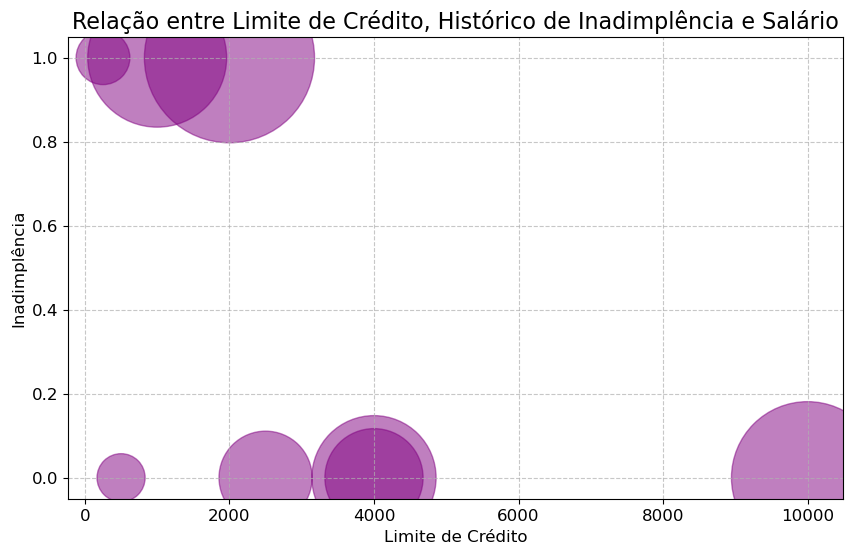

In [90]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Limite_Credito'], df['Historico_Inadimplencia'], df['Salário'], color='purple', alpha=0.5)

#Legendas
plt.title('Relação entre Limite de Crédito, Histórico de Inadimplência e Salário', fontsize=16)
plt.xlabel('Limite de Crédito', fontsize=12)
plt.ylabel('Inadimplência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Mapa de Calor**  
No mapa de calor conseguimos conferir a relação entre diversas variáveis.  
Analisando unicamente a variável "Limite_Credito" observamos que "Salário", "Historico_Inadimplencia" e "Estado_Civil" possuem uma relação mais direta, mesmo que resultando em valores negativos em alguns casos.

In [91]:
df['Estado_Civil'] = df['Estado_Civil'].replace({
    'Casamento' : 0,
    'Solteiro' : 1
})
df.head(5)

C:\Users\Mylla\AppData\Local\Temp\ipykernel_26124\3441231213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Estado_Civil'] = df['Estado_Civil'].replace({


,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,0,0
1,Joao,30,Médico,8000,4000,0,0,0
2,Charlie,35,Professor,5000,4000,0,1,0
3,David,40,Advogado,10000,1000,1,1,1
4,Eva,45,Médico,12000,10000,0,0,1


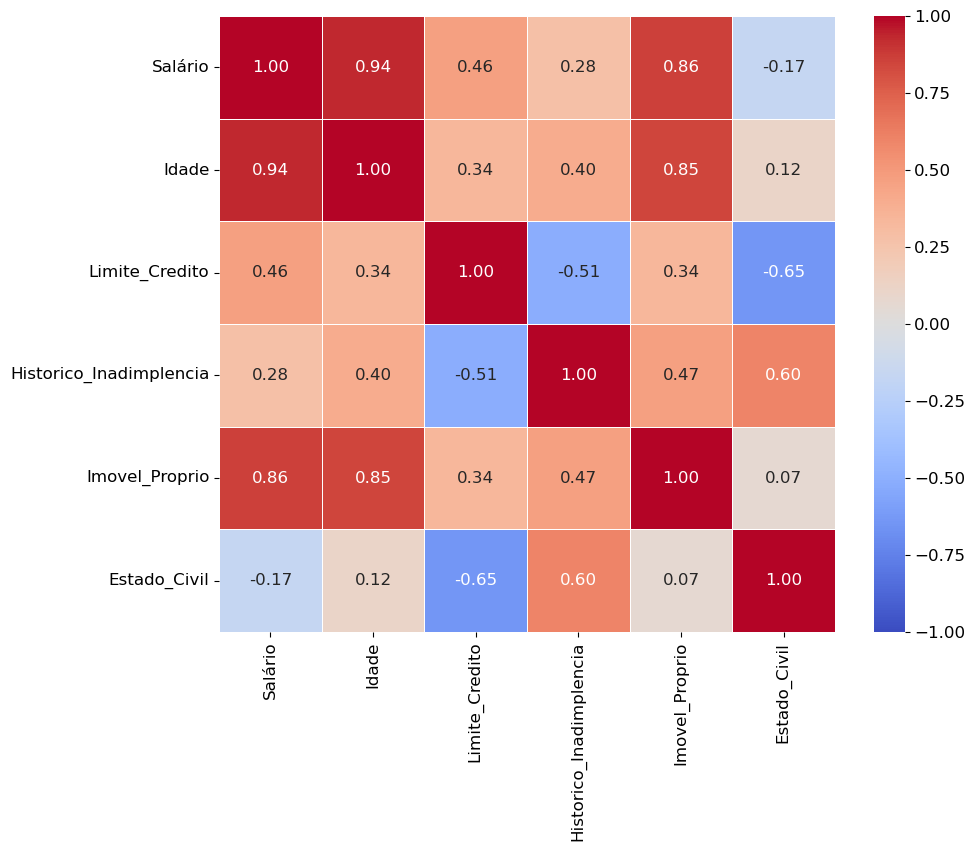

In [92]:
corr = df[['Salário', 'Idade', 'Limite_Credito', 'Historico_Inadimplencia', 'Imovel_Proprio', 'Estado_Civil']].corr()
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()